##  Plasma calculations with PlasmaPy

This notebook shows how to calculate various plasma parameters (Alfvén speed, plasma beta, Debye length, etc.) with MMS data and the PlasmaPy package. You will need to install `plasmapy` prior to running this notebook. To install `plasmapy`, on the command line, type:
   
`pip install plasmapy`

For more information on PlasmaPy, see:

https://docs.plasmapy.org/

### Load the data
To get started, we import `pyspedas` and load the MMS data for October 16, 2015

In [15]:
import pyspedas

trange = ['2015-10-16/13:00', '2015-10-16/13:10']

pyspedas.mms.fgm(trange=trange, data_rate='brst', time_clip=True)
pyspedas.mms.fpi(datatype=['dis-moms', 'des-moms'], trange=trange, data_rate='brst', time_clip=True, center_measurement=True)

27-Jan-22 19:09:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016125604_v4.18.1.cdf
27-Jan-22 19:09:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130224_v4.18.1.cdf
27-Jan-22 19:09:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130334_v4.18.1.cdf
27-Jan-22 19:09:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf
27-Jan-22 19:09:48: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130904_v4.18.1.cdf


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_b_gsm_brst_l2
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
Time clip was applied to: mms1_fgm_b_bcs_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Time clip was applied to: mms1_fgm_r_gse_brst_l2
Time clip was applied to: mms1_fgm_r_gsm_brst_l2
Time clip was applied to: mms1_fgm_hirange_brst_l2
Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2
Time clip was applied to: mms1_fgm_stemp_brst_l2
Time clip was applied to: mms1_fgm_etemp_brst_l2
Time clip was applied to: mms1_fgm_mode_brst_l2
Time clip error: No pytplot names were provided.
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_brst_l2
mms1_fgm_b_gsm_brst_l2
mms

27-Jan-22 19:09:51: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016125604_v3.3.0.cdf
27-Jan-22 19:09:51: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130224_v3.3.0.cdf
27-Jan-22 19:09:51: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130334_v3.3.0.cdf
27-Jan-22 19:09:51: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130524_v3.3.0.cdf
27-Jan-22 19:09:51: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130904_v3.3.0.cdf
27-Jan-22 19:09:52: Loading pydata/mms1/fpi/brst/l2/des-moms/2015/10/16/mms1_fpi_brst_l2_des-moms_20151016125604_v3.3.0.cdf
27-Jan-22 19:09:52: Loading pydata/mms1/fpi/brst/l2/des-moms/2015/10/16/mms1_fpi_brst_l2_des-moms_20151016130224_v3.3.0.cdf
27-Jan-22 19:09:52: Loading pydata/mms1/fpi/brst/l2/des-moms/2015/10/16/mms1_fpi_brst_l2_des-moms_20151016130334_v3.3.0.cdf
27-Jan-2

Time clip was applied to: mms1_des_errorflags_brst
Time clip was applied to: mms1_des_compressionloss_brst
Time clip was applied to: mms1_des_steptable_parity_brst
Time clip was applied to: mms1_des_startdelphi_count_brst
Time clip was applied to: mms1_des_startdelphi_angle_brst
Time clip was applied to: mms1_des_sector_despinp_brst
Time clip was applied to: mms1_des_pitchangdist_lowen_brst
Time clip was applied to: mms1_des_pitchangdist_miden_brst
Time clip was applied to: mms1_des_pitchangdist_highen_brst
Time clip was applied to: mms1_des_energyspectr_px_brst
Time clip was applied to: mms1_des_energyspectr_mx_brst
Time clip was applied to: mms1_des_energyspectr_py_brst
Time clip was applied to: mms1_des_energyspectr_my_brst
Time clip was applied to: mms1_des_energyspectr_pz_brst
Time clip was applied to: mms1_des_energyspectr_mz_brst
Time clip was applied to: mms1_des_energyspectr_par_brst
Time clip was applied to: mms1_des_energyspectr_anti_brst
Time clip was applied to: mms1_des_e

['Epoch',
 'Epoch_plus_var',
 'Epoch_minus_var',
 'mms1_des_errorflags_brst',
 'mms1_des_compressionloss_brst',
 'mms1_des_steptable_parity_brst',
 'mms1_des_startdelphi_count_brst',
 'mms1_des_startdelphi_angle_brst',
 'mms1_des_sector_despinp_brst',
 'mms1_des_pitchangdist_lowen_brst',
 'mms1_des_pitchangdist_miden_brst',
 'mms1_des_pitchangdist_highen_brst',
 'mms1_des_energyspectr_px_brst',
 'mms1_des_energyspectr_mx_brst',
 'mms1_des_energyspectr_py_brst',
 'mms1_des_energyspectr_my_brst',
 'mms1_des_energyspectr_pz_brst',
 'mms1_des_energyspectr_mz_brst',
 'mms1_des_energyspectr_par_brst',
 'mms1_des_energyspectr_anti_brst',
 'mms1_des_energyspectr_perp_brst',
 'mms1_des_energyspectr_omni_brst',
 'mms1_des_numberdensity_brst',
 'mms1_des_numberdensity_err_brst',
 'mms1_des_densityextrapolation_low_brst',
 'mms1_des_densityextrapolation_high_brst',
 'mms1_des_bulkv_dbcs_brst',
 'mms1_des_bulkv_spintone_dbcs_brst',
 'mms1_des_bulkv_gse_brst',
 'mms1_des_bulkv_spintone_gse_brst',
 '

### Interpolate to a common set of times

Now we need to interpolate the B-field and DES (electron) data to the DIS (ion) time stamps


Note: tinterpol creates a new variable containing the interpolated output with the suffix '-itrp'

In [16]:
from pyspedas import tinterpol
tinterpol('mms1_fgm_b_gse_brst_l2_btot', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_numberdensity_brst', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_temppara_brst', 'mms1_dis_numberdensity_brst')
tinterpol('mms1_des_tempperp_brst', 'mms1_dis_numberdensity_brst')

tinterpol (linear) was applied to: mms1_fgm_b_gse_brst_l2_btot-itrp
tinterpol (linear) was applied to: mms1_des_numberdensity_brst-itrp
tinterpol (linear) was applied to: mms1_des_temppara_brst-itrp
tinterpol (linear) was applied to: mms1_des_tempperp_brst-itrp


### Extract the data values

In [17]:
from pytplot import get_data
fgm_b = get_data('mms1_fgm_b_gse_brst_l2_btot-itrp')
dis_n = get_data('mms1_dis_numberdensity_brst')
dis_Tpara = get_data('mms1_dis_temppara_brst')
dis_Tperp = get_data('mms1_dis_tempperp_brst')
des_n = get_data('mms1_des_numberdensity_brst-itrp')
des_Tpara = get_data('mms1_des_temppara_brst-itrp')
des_Tperp = get_data('mms1_des_tempperp_brst-itrp')

### Calculate T from Tpara and Tperp

Temperature data released by the FPI team come as parallel and perpendicular components; to calculate plasma parameters, we'll need the total temperature.

For details on this calculation, please see the FPI Data Product Guide:

https://lasp.colorado.edu/galaxy/pages/viewpage.action?pageId=37618954

In [18]:
dis_T = (dis_Tpara.y + 2*dis_Tperp.y)/3.0
des_T = (des_Tpara.y + 2*des_Tperp.y)/3.0

### Add units to the data

PlasmaPy requires us to specify the units of the data using `astropy` units

In [19]:
from astropy import units as u
B = fgm_b.y * u.nT
n_i = dis_n.y * u.cm**-3
n_e = des_n.y * u.cm**-3
T_i = dis_T * u.eV
T_e = des_T * u.eV

Now that we have some data loaded, we'll calculate some plasma parameters 

In [20]:
import plasmapy

### Alfvén speed

In [21]:
Va = plasmapy.formulary.parameters.Alfven_speed(B, n_i, 'p')

# convert to km / s
Va = Va.to(u.km / u.s)

### Plasma beta

In [22]:
# ions
beta_i = plasmapy.formulary.dimensionless.beta(T_i, n_i, B)

# electrons
beta_e = plasmapy.formulary.dimensionless.beta(T_e, n_e, B)

# combined
beta = beta_i + beta_e

### Ion inertial length

In [23]:
d_i = plasmapy.formulary.parameters.inertial_length(n_i, 'p+')

27-Jan-22 19:10:06: /usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)



### Debye length

In [24]:
lamda_d = plasmapy.formulary.parameters.Debye_length(T_e, n_e)

### Ion gyrofrequency

In [25]:
omega_ci = plasmapy.formulary.parameters.gyrofrequency(B, 'p', to_hz=True)

### Ion gyroradius

In [26]:
r_i = plasmapy.formulary.parameters.gyroradius(B, 'p', T=T_i)

# convert to km
r_i = r_i.to(u.km)

### Bohm diffusion coefficient

In [27]:
DB = plasmapy.formulary.parameters.Bohm_diffusion(T_e, B)

### Lower hybrid frequency

In [28]:
omega_lh = plasmapy.formulary.parameters.lower_hybrid_frequency(B, n_i, 'p', to_hz=True)

27-Jan-22 19:10:06: /usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)



### Upper hybrid frequency

In [29]:
omega_uh = plasmapy.formulary.parameters.upper_hybrid_frequency(B, n_e, to_hz=True)

### Save the data in tplot variables

In [30]:
from pytplot import store_data
store_data('alfven_speed', data={'x': fgm_b.times, 'y': Va})
store_data('plasma_beta', data={'x': fgm_b.times, 'y': beta})
store_data('ion_inertial_length', data={'x': fgm_b.times, 'y': d_i})
store_data('debye_length', data={'x': fgm_b.times, 'y': lamda_d})
store_data('omega_ci', data={'x': fgm_b.times, 'y': omega_ci})
store_data('ion_gyroradius', data={'x': fgm_b.times, 'y': r_i})
store_data('bohm_diffusion_coeff', data={'x': fgm_b.times, 'y': DB})
store_data('omega_lh', data={'x': fgm_b.times, 'y': omega_lh})
store_data('omega_uh', data={'x': fgm_b.times, 'y': omega_uh})

True

### Set some plot metadata

In [31]:
from pytplot import options
options('alfven_speed', 'ytitle', 'Va \\ (' + str(Va.unit) + ')')
options('alfven_speed', 'legend_names', 'Alfvén speed')
options('plasma_beta', 'ytitle', 'Beta')
options('plasma_beta', 'legend_names', 'Plasma Beta')
options('ion_inertial_length', 'ytitle', 'd_i \\ (' + str(d_i.unit) + ')')
options('ion_inertial_length', 'legend_names', 'Ion inertial length')
options('debye_length', 'ytitle', 'Lamda_d \\ (' + str(lamda_d.unit) + ')')
options('debye_length', 'legend_names', 'Debye length')
options('omega_ci', 'ytitle', 'omega_ci \\ (' + str(omega_ci.unit) + ')')
options('omega_ci', 'legend_names', 'Ion gyrofrequency')
options('ion_gyroradius', 'ytitle', 'r_i \\ (' + str(r_i.unit) + ')')
options('ion_gyroradius', 'legend_names', 'Ion gyroradius')
options('bohm_diffusion_coeff', 'ytitle', 'DB \\ (' + str(DB.unit) + ')')
options('bohm_diffusion_coeff', 'legend_names', 'Bohm diffusion coefficient')
options('omega_uh', 'ytitle', 'omega_uh \\ (' + str(omega_uh.unit) + ')')
options('omega_uh', 'legend_names', 'Upper hybrid frequency')
options('omega_lh', 'ytitle', 'omega_lh \\ (' + str(omega_lh.unit) + ')')
options('omega_lh', 'legend_names', 'Lower hybrid frequency')

### Plot the results

27-Jan-22 19:10:07: /usr/local/lib/python3.7/dist-packages/pytplot/MPLPlotter/tplot.py:220: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  this_axis.set_ylim(yrange)



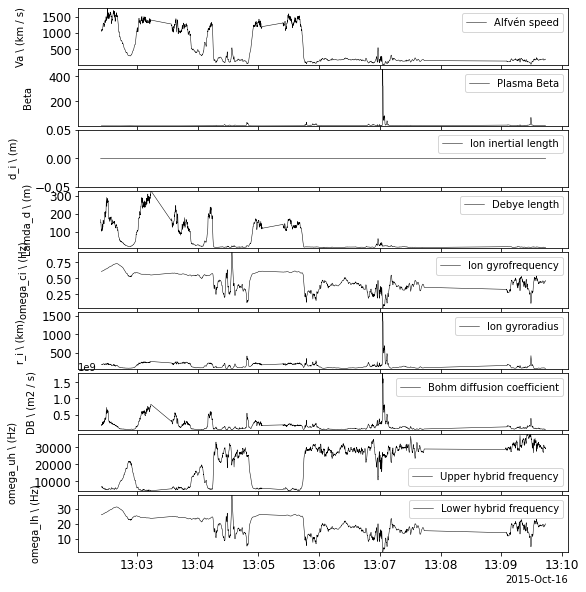

In [32]:
from pytplot import tplot
tplot(['alfven_speed', 
       'plasma_beta',
       'ion_inertial_length',
       'debye_length',
       'omega_ci',
       'ion_gyroradius',
       'bohm_diffusion_coeff',
       'omega_uh',
       'omega_lh'])